In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import cg as sp_cg
from scipy.signal import welch
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [73]:
npix=10
nsamp=100
pix =np.arange(nsamp).astype(float)*npix/nsamp

In [74]:
pix

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

The code you've provided is setting up a simple 1D case for a nearest neighbor pointing matrix. Here's a breakdown:

1. `npix=10`: This line is setting the number of pixels (`npix`) to 10. This represents the total number of pixels that the samples will be spread across.

2. `nsamp=100`: This line is setting the number of samples (`nsamp`) to 100. This represents the total number of samples that will be taken.

3. `pix =np.arange(nsamp).astype(float)*npix/nsamp`: This line is creating an array of sample points (`pix`). It does this by creating an array of integers from 0 to `nsamp-1`, converting those integers to floats, and then scaling the values so that they are spread uniformly across the `npix` pixels.

In this setup, each pixel will contain an average of `nsamp/npix` samples, which in this case is 10 samples per pixel. The samples are spread uniformly, so each pixel will contain approximately the same number of samples.

This setup could be used to simulate a situation where a detector is scanning across a field and taking samples at regular intervals. The nearest neighbor pointing matrix would then be used to assign each sample to the nearest pixel. The subpixel errors could be introduced by the fact that the samples are not necessarily located exactly at the center of the pixels.

In [75]:
P=np.zeros((nsamp,npix))
for i,p in enumerate(pix):
    P[i,int(np.round(pix[i])%npix)]=1

This Python code is creating a nearest neighbor pointing matrix `P`. Here's a breakdown:

1. `P=np.zeros((nsamp,npix))`: This line is initializing `P` as a 2D array with `nsamp` rows and `npix` columns, filled with zeros. Each row represents a sample and each column represents a pixel.

2. `for i,p in enumerate(pix):`: This line is starting a loop that will iterate over each element in the `pix` array. The `enumerate` function is used to get both the index (`i`) and the value (`p`) of each element.

3. `P[i,int(np.round(pix[i])%npix)]=1`: This line is doing a few things:
    - `np.round(pix[i])`: This is rounding the value of the `i`-th element in the `pix` array to the nearest integer. This represents the pixel that the `i`-th sample falls into.
    - `%npix`: This is taking the modulus of the pixel number by `npix`. This ensures that the pixel number wraps around to 0 if it's equal to `npix`, effectively creating a circular buffer of pixels.
    - `P[i,int(np.round(pix[i])%npix)]=1`: This is setting the value in the `i`-th row and `int(np.round(pix[i])%npix)`-th column of `P` to 1. This indicates that the `i`-th sample falls into the `int(np.round(pix[i])%npix)`-th pixel.

So, the result of this code is a pointing matrix `P` where each row has a single 1 in the column corresponding to the pixel that the sample falls into, and 0s elsewhere. This is a simple way to represent which pixel each sample is assigned to.

In [76]:
P

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 

In [77]:
freq = np.fft.rfftfreq(nsamp)
inv_ps=1/(1+(np.maximum(freq,freq[1]/2)/0.03)**-3.5)
F=np.zeros((nsamp,nsamp))
I=np.eye(nsamp)
for i in range(nsamp):
    F[:,i]=np.fft.irfft(inv_ps*np.fft.rfft(I[i]),n=nsamp)

In [78]:
inv_ps

array([0.00188647, 0.02093567, 0.19479834, 0.5       , 0.73241054,
       0.85666835, 0.9187897 , 0.95099295, 0.96871714, 0.97906433,
       0.985427  , 0.98951729, 0.99224806, 0.99413097, 0.99546578,
       0.99643505, 0.99715379, 0.99769669, 0.99811353, 0.99843826,
       0.99869457, 0.99889928, 0.99906451, 0.99919919, 0.99930994,
       0.99940176, 0.99947846, 0.99954296, 0.99959756, 0.99964406,
       0.99968387, 0.99971814, 0.99974777, 0.99977352, 0.99979599,
       0.99981567, 0.99983297, 0.99984824, 0.99986176, 0.99987378,
       0.99988448, 0.99989404, 0.99990261, 0.99991031, 0.99991724,
       0.9999235 , 0.99992917, 0.9999343 , 0.99993897, 0.99994322,
       0.99994709])

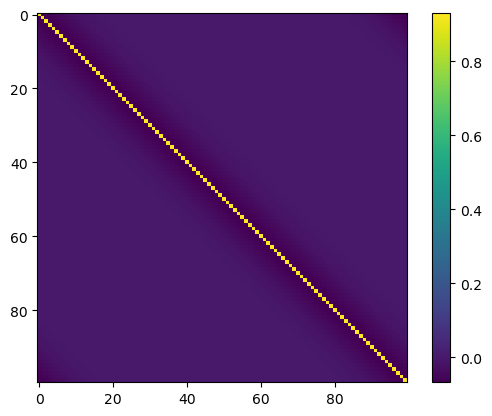

In [79]:
signal=np.sin(2*np.pi*pix/npix)
signal.shape
#plt.imshow(np.linalg.inv(F))
plt.imshow(F)
plt.colorbar()

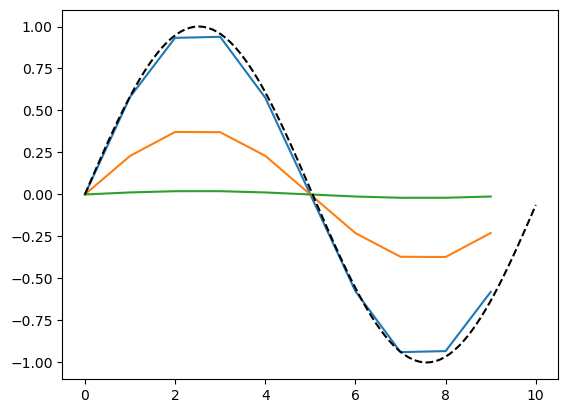

In [80]:
map_binned = np.linalg.solve((P.T.dot(P)), P.T.dot(signal))
map_ml = np.linalg.solve((P.T.dot(F).dot(P)),P.T.dot(F.dot(signal)))
map_fb = np.linalg.solve(P.T.dot(P), P.T.dot(F).dot(signal))
def dewin(x):
    return np.fft.irfft(np.fft.rfft(x) / np.sinc(freq),n=len(x)).real
plt.plot(np.arange(npix),map_binned)
plt.plot(np.arange(npix),map_ml)
plt.plot(np.arange(npix),map_fb)
signal=dewin(signal)
plt.plot(np.linspace(0,npix,nsamp),signal,c='k',ls='--')


## 2D Toy

In [81]:
import numpy as np, scipy, time
import cg
from pixell import utils, mpi
from scipy.sparse.linalg import cg, LinearOperator

A toy example for a single detector scanning at a constant speed across the sky (square patch).

In [82]:
nside = 100   # Number of pixels per side
nscan = nside*4 # Number of samples per row. 
npix  = nside**2 # Number of pixels in map
nsim  = 400   # Number of idk what


# Generate two scanning patterns
pix_pat1 = (np.mgrid[:nscan,:nscan]*nside/nscan).reshape(2,-1)
pix_pat2 = pix_pat1[::-1] # swap x and y for other pattern
pix      = np.concatenate([pix_pat1,pix_pat2],1)  # Combine the two patterns
nsamp    = pix.shape[1]

In [83]:
(np.mgrid[:nscan,:nscan]*nside/nscan).reshape(2,-1).shape

(2, 160000)

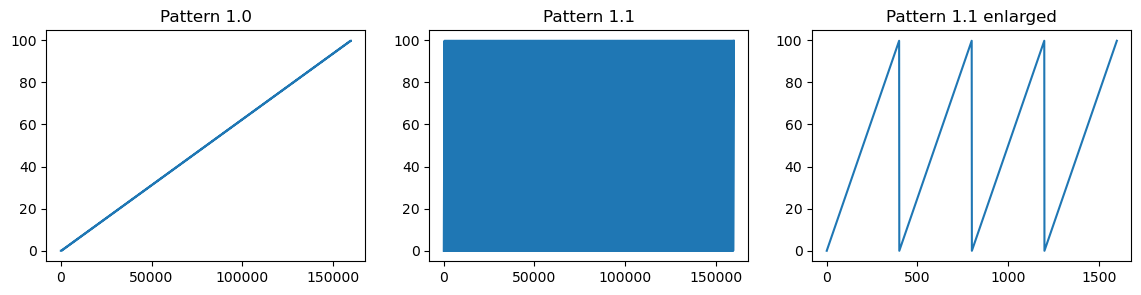

In [84]:
fig,ax=plt.subplots(1,3,figsize=(14,3))
ax[0].plot(np.arange(160000),pix_pat1[0])
ax[0].set_title('Pattern 1.0')
ax[1].plot(np.arange(160000),pix_pat1[1])
ax[1].set_title('Pattern 1.1')
ax[2].plot(np.arange(1600),pix_pat1[1][:1600])
ax[2].set_title('Pattern 1.1 enlarged')
plt.savefig('pattern.png',bbox_inches='tight',dpi=200)


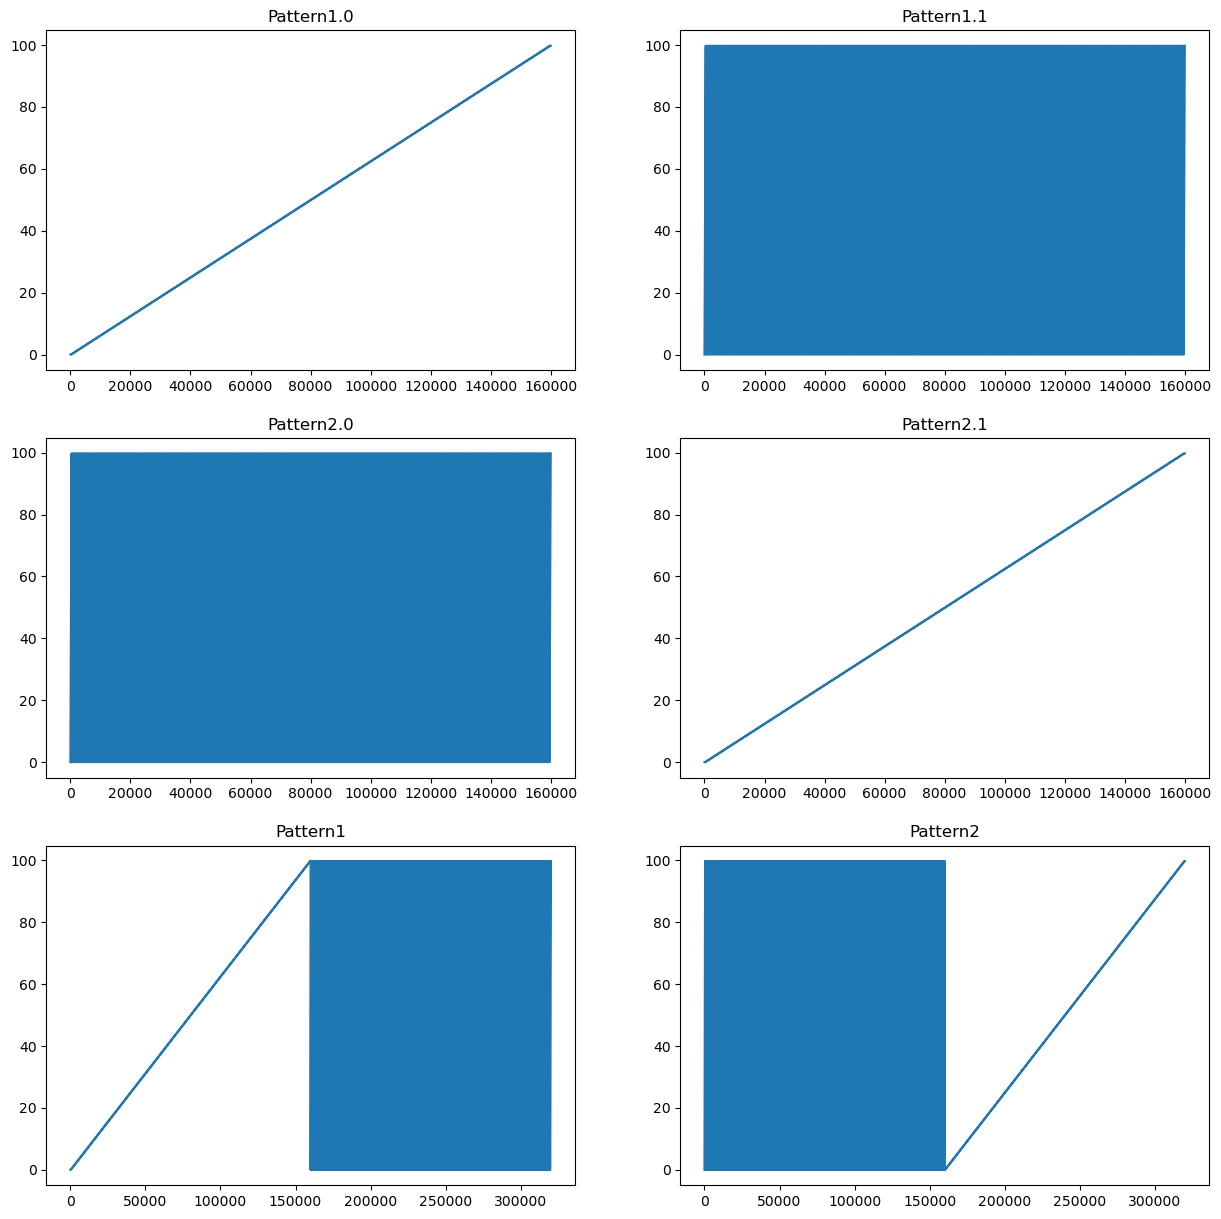

In [85]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

ax[0, 0].plot(np.arange(160000), pix_pat1[0])
ax[0, 0].set_title('Pattern1.0')

ax[0, 1].plot(np.arange(160000), pix_pat1[1])
ax[0, 1].set_title('Pattern1.1')

ax[1, 0].plot(np.arange(160000), pix_pat2[0])
ax[1, 0].set_title('Pattern2.0')

ax[1, 1].plot(np.arange(160000), pix_pat2[1])
ax[1, 1].set_title('Pattern2.1')

ax[2, 0].plot(np.arange(320000), pix[0])
ax[2, 0].set_title('Pattern1')

ax[2, 1].plot(np.arange(320000), pix[1])
ax[2, 1].set_title('Pattern2')
plt.savefig('patterns1.png',dpi=300)
plt.show()



In [86]:
# Build a nearest neighbor sparse pointing matrix
iy, ix  = np.floor(pix+0.5).astype(int)%nside  # Nearest pixel
P_nn    = scipy.sparse.csr_array((np.full(nsamp,1),(np.arange(nsamp),iy*nside+ix)),shape=(nsamp,npix))

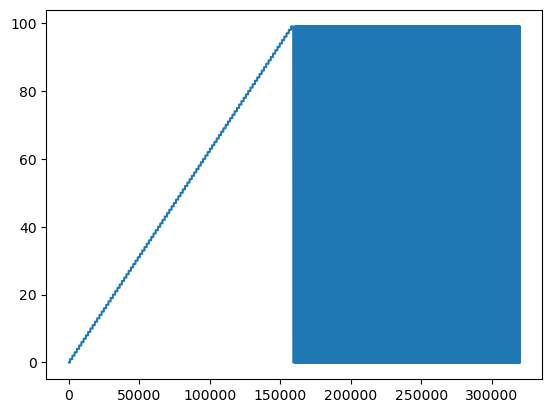

In [87]:
plt.plot(np.arange(len(pix[0])), np.floor(pix+0.5)[0].astype(int)%nside)

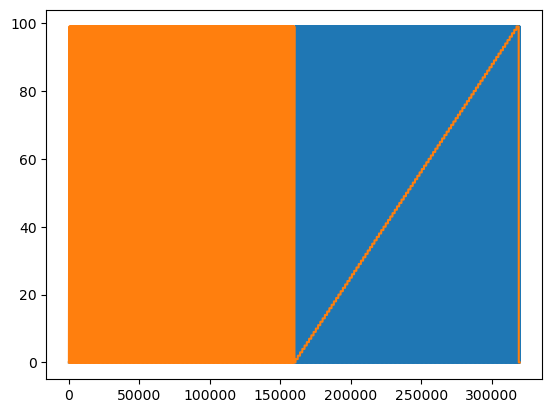

In [88]:
plt.plot(np.arange(len(iy)),iy)
plt.plot(np.arange(len(ix)),ix)

In [89]:
# Build a bilinear pointing matrix. Here a sample with coordinates
# y,x has value
# (1-ry)*(1-rx)*val[iy,ix] + (1-ry)*rx*val[iy,ix+1] + ry*(1-rx)*val[iy+1,ix] + ry*rx*val[iy+1,ix+1]
# where iy = floor(y) and ry = y-iy, etc.
# We want the pixel centers to be the control points for the interpolation.
# To get this we need floor(pix) instead of floor(pix+0.5)
#pix_left  = np.floor(pix+0.5).astype(int)
pix_left  = np.floor(pix).astype(int)
ry, rx    = pix-pix_left
iy1,ix1   = pix_left % nside
iy2,ix2   = (pix_left+1)% nside
P_lin     = scipy.sparse.csr_array((
	np.concatenate([(1-ry)*(1-rx), (1-ry)*rx, ry*(1-rx), ry*rx]),
	(np.tile(np.arange(nsamp),4),
		np.concatenate([iy1*nside+ix1, iy1*nside+ix2, iy2*nside+ix1, iy2*nside+ix2])
	)), shape=(nsamp,npix))
# load the linear interp tfun
freq_lin_1d, tfun_lin_1d = np.loadtxt("/vol/arc4/data1/asrivastava/model_error2/subpix/tfun_lin_1d.txt").T

In [90]:
# Build the inverse noise matrix. We want the noise to be pretty correlated, so
# let's have the fknee correspond to 1/30th of a side length. We can't
# afford to store the full thing, so just store the fourier-diagonal
#fknee = 0.5*30/nscan
fknee = 0.01
freq  = np.fft.rfftfreq(nsamp)
alpha=-3.5
iN    = 1/(1+(np.maximum(freq,freq[1]/2)/fknee)**alpha)


# Truncate the power law at a high but not extreme value. This is
# realistic and also avoids convergence problems for the destriper
iN    = np.maximum(iN, np.max(iN)*1e-8)
iNw   = 1
iNw_destripe = iNw * (1+1e-1)
iNc   = 1/(1/iN - 1/iNw_destripe)

In [91]:
0.5*30/nscan

0.0375

Text(0, 0.5, 'Inverse Noise')

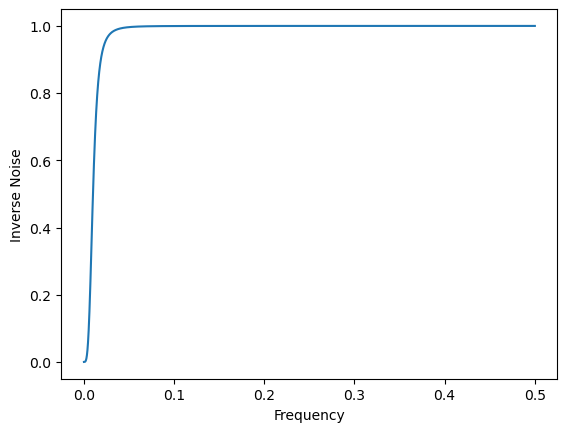

In [92]:
plt.plot(freq,iN)
plt.xlabel("Frequency")
plt.ylabel("Inverse Noise")

Text(0.5, 1.0, 'l space')

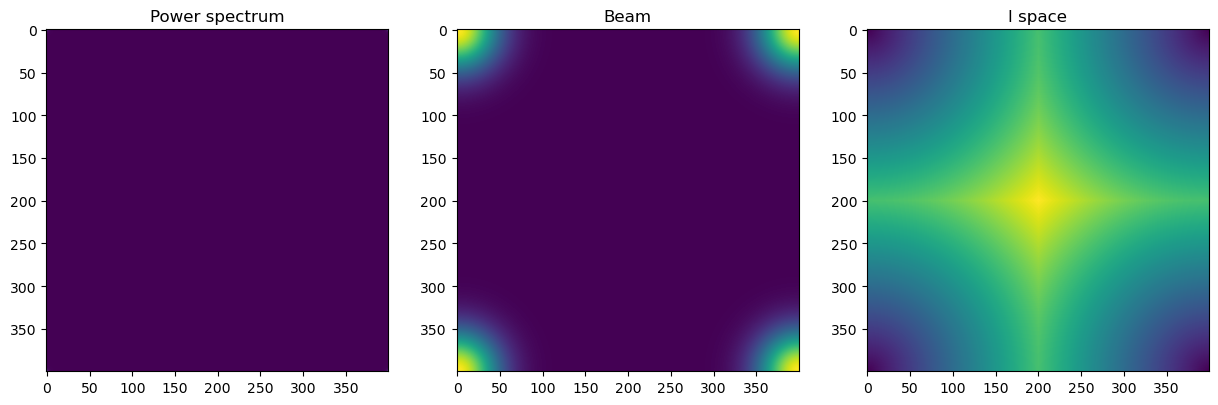

In [150]:
# Build the signal. It will be a simple 1/l**2 spectrum. We simulate this directly
# on the grid of the actual samples

def calc_l(n):
	ly = np.fft.fftfreq(n)[:,None]
	lx = np.fft.fftfreq(n)[None,:]
	l  = (ly**2+lx**2)**0.5
	return l


l      = calc_l(nscan)*nscan/nside # express in units of output pixels
lnorm  = 1
C      = (np.maximum(l,l[0,1]/2)/lnorm)**-2
# Make band-limited by applying a beam. nscan/nside translates from
# the target pixels to the sample spacing
bsigma = 3
B      = np.exp(-0.5*l**2*bsigma**2)

# plotting everything
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(C)
ax[0].set_title("Power spectrum")
ax[1].imshow(B)
ax[1].set_title("Beam")
ax[2].imshow(l)
ax[2].set_title("l space")



In [94]:
calc_l(nscan)*nscan/nside

array([[0.        , 0.01      , 0.02      , ..., 0.03      , 0.02      ,
        0.01      ],
       [0.01      , 0.01414214, 0.02236068, ..., 0.03162278, 0.02236068,
        0.01414214],
       [0.02      , 0.02236068, 0.02828427, ..., 0.03605551, 0.02828427,
        0.02236068],
       ...,
       [0.03      , 0.03162278, 0.03605551, ..., 0.04242641, 0.03605551,
        0.03162278],
       [0.02      , 0.02236068, 0.02828427, ..., 0.03605551, 0.02828427,
        0.02236068],
       [0.01      , 0.01414214, 0.02236068, ..., 0.03162278, 0.02236068,
        0.01414214]])

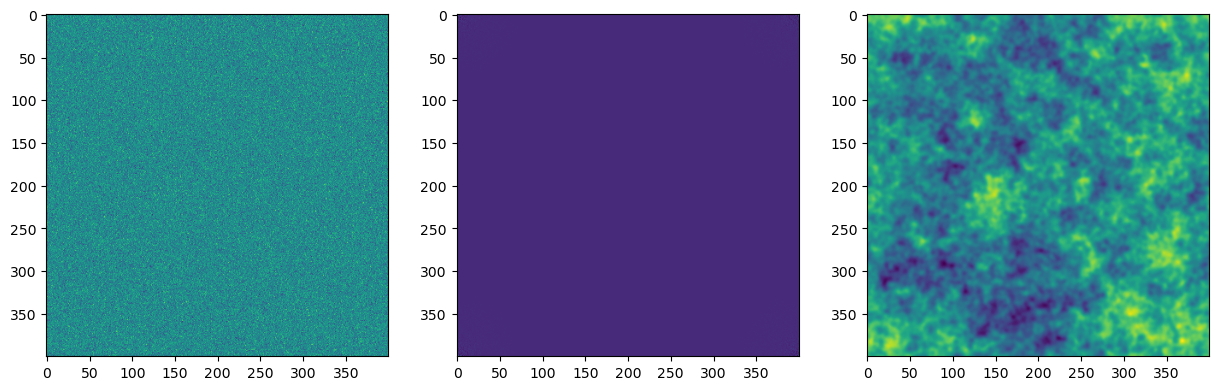

In [151]:
test_signal=np.random.normal(0, 1, (nscan, nscan))
fig,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].imshow(test_signal)
ax[1].imshow(np.fft.fft2(test_signal).real*C**0.5*B)
ax[2].imshow(np.fft.ifft2(np.fft.fft2(test_signal)*C**0.5*B).real)

Text(0, 0.5, 'C_l')

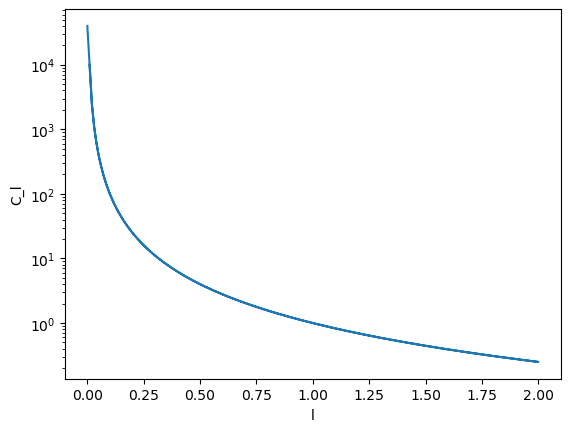

In [152]:
plt.semilogy(l[0],C[0])
plt.xlabel("l")
plt.ylabel("C_l")

In [153]:
def fmul(f,x):
	if np.asarray(f).size == 1: return f*x
	else: return np.fft.irfft(np.fft.rfft(x)*f,n=len(x)).real

def sim_signal(C, B, nscan):
	signal_map = np.fft.ifft2(np.fft.fft2(np.random.standard_normal((nscan,nscan)))*C**0.5*B).real
	#signal_map = np.fft.ifft2(np.fft.fft2(np.random.standard_normal((nside,nside)))*C**0.5*B).real
	signal = np.concatenate([signal_map.reshape(-1), signal_map.T.reshape(-1)])
	return signal, signal_map
def sim_noise(iN, nsamp):
	noise  = fmul(iN**-0.5, np.random.standard_normal(nsamp))
	return noise

In [154]:
# def mapmaker_ml(tod, P, iN):
# 	b = P.T.dot(fmul(iN,tod))
# 	def A(x): return P.T.dot(fmul(iN,P.dot(x)))
# 	solver = cg.CG(A, b)
# 	while solver.err > 1e-8: solver.step()
# 	return solver.x.reshape(nside,nside)

def mapmaker_ml(tod, P, iN):
    b = P.T.dot(fmul(iN, tod))

    def A(x):
        return P.T.dot(fmul(iN, P.dot(x)))

    # Ensuring that A and b are compatible with scipy.sparse.linalg.cg
    A_op = LinearOperator((len(b), len(b)), matvec=A)

    # Solve the linear system using SciPy's CG solver
    x, info = cg(A_op, b, tol=1e-8)

    if info > 0:
        print("Conjugate gradient solver did not converge.")

    return x.reshape(nside, nside)

def mapmaker_bin(tod, P):
	return scipy.sparse.linalg.spsolve(P.T.dot(P), P.T.dot(tod)).reshape(nside, nside)

def mapmaker_filter_bin(tod, P, F):
	return scipy.sparse.linalg.spsolve(P.T.dot(P), P.T.dot(fmul(F,tod))).reshape(nside, nside)



In [155]:
tod=sim_signal(C,B,nscan)[0]
map=sim_signal(C,B,nscan)[1]
noise=sim_noise(iN,nsamp)
map_ml=mapmaker_ml(tod,P_nn,iN)
noise_ml=mapmaker_ml(noise,P_nn,iN)
map_bin=mapmaker_bin(tod,P_nn)
map_noise_bin=mapmaker_bin(noise,P_nn)



In [100]:
map_ml=mapmaker_ml(tod,P_nn,iN)

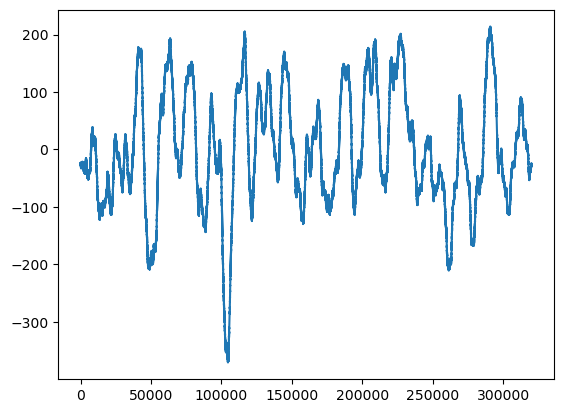

In [101]:
plt.plot(np.arange(len(noise)),noise)

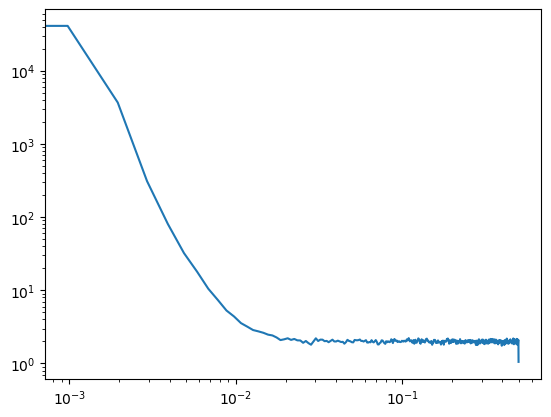

In [156]:

f,psd=welch(noise,fs=1,nperseg=1024,window='hanning')

plt.loglog(f,psd)


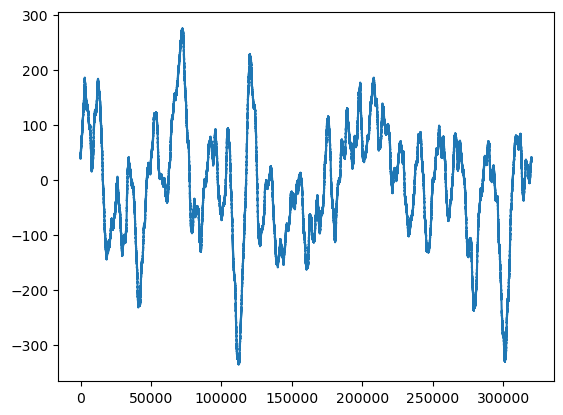

In [157]:
plt.plot(np.arange(nsamp),noise)

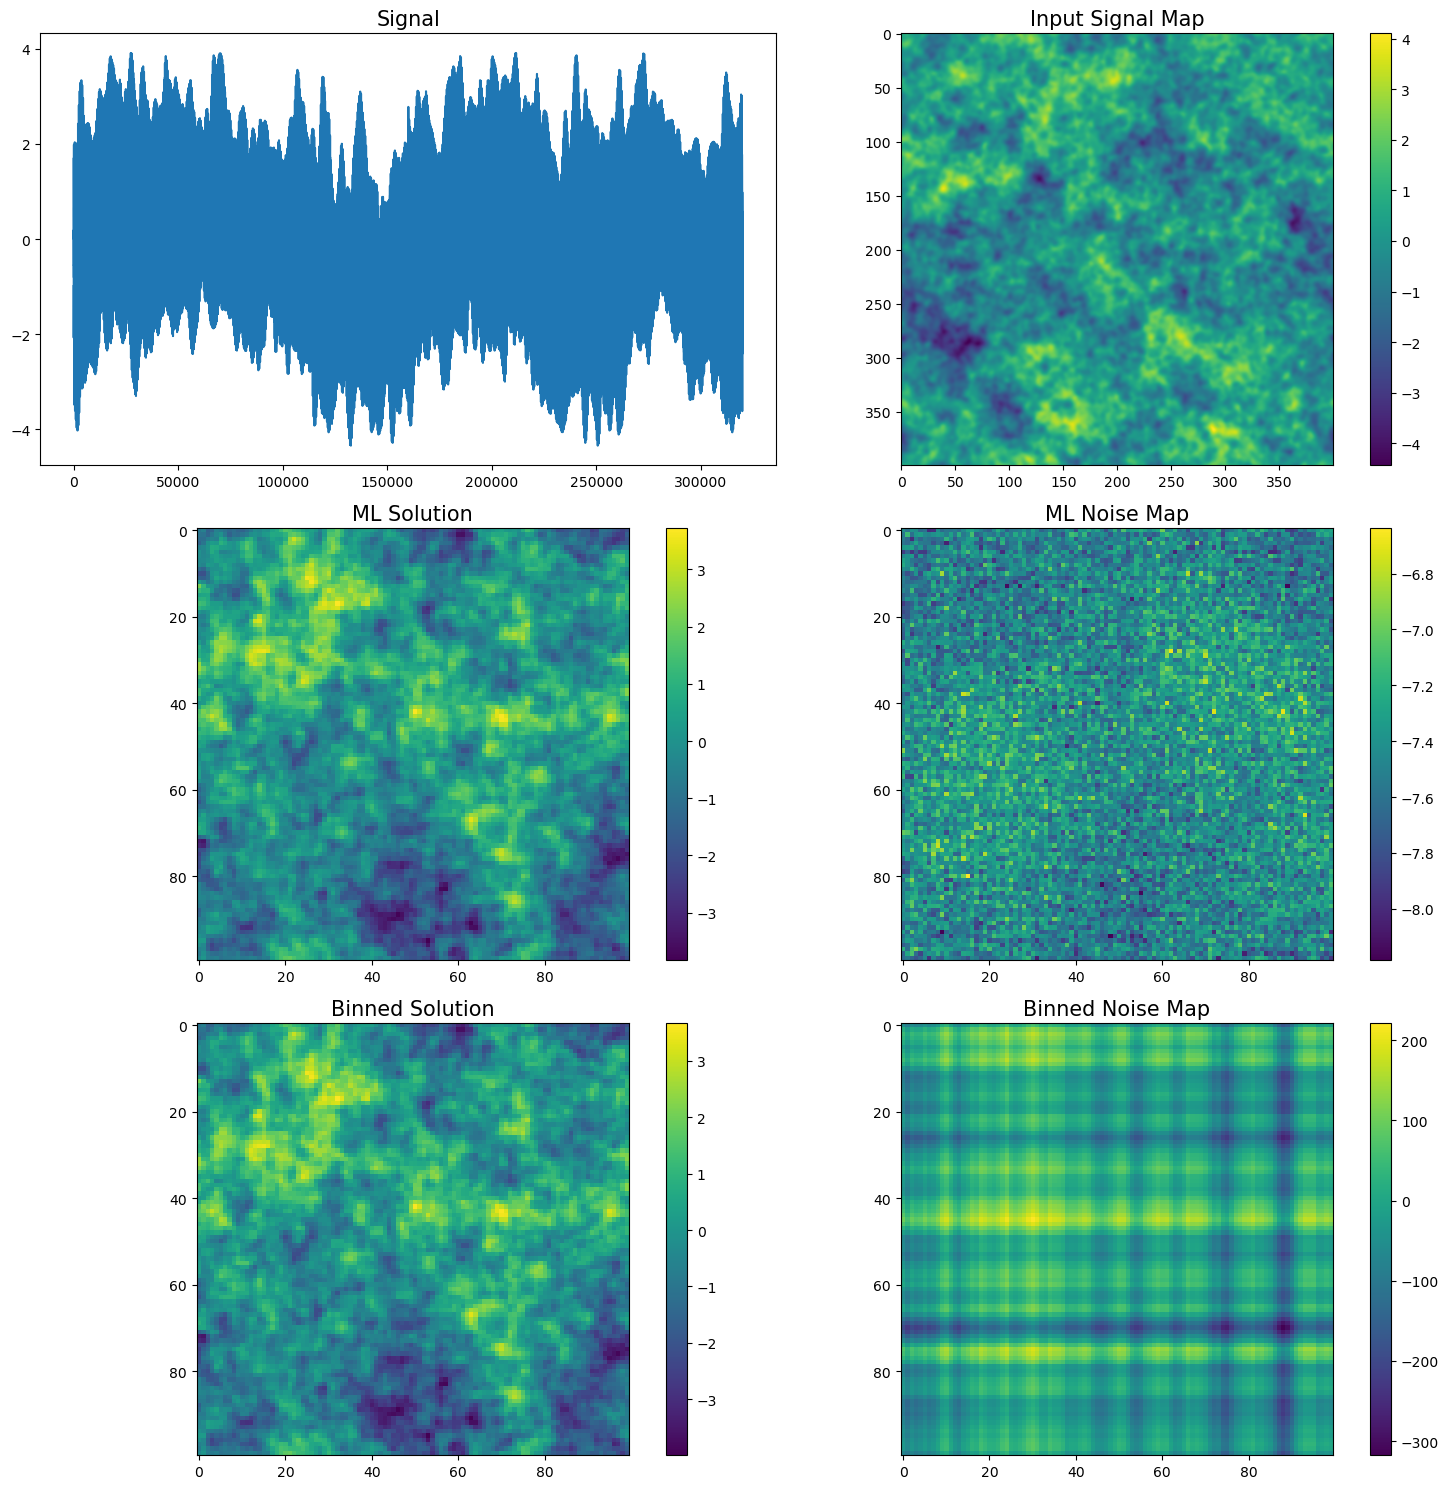

In [160]:
figure, ax = plt.subplots(3, 2, figsize=(15, 15))
ax[0,0].plot(np.arange(0, nsamp, 1), tod)
ax[0,0].set_title('Signal',fontsize=15)
ax[0,1].imshow(map,cmap='viridis')
ax[0,1].set_title('Input Signal Map',fontsize=15)
ax[1,0].imshow(map_ml,cmap='viridis')
ax[1,0].set_title('ML Solution',fontsize=15)
ax[1,1].imshow(noise_ml,cmap='viridis')
ax[1,1].set_title('ML Noise Map',fontsize=15)
ax[2,0].imshow(map_bin,cmap='viridis')
ax[2,0].set_title('Binned Solution',fontsize=15)
ax[2,1].imshow(map_noise_bin,cmap='viridis')
ax[2,1].set_title('Binned Noise Map',fontsize=15)
figure.colorbar(ax[0,1].imshow(map), ax=ax[0,1])
figure.colorbar(ax[1,0].imshow(map_ml), ax=ax[1,0])
figure.colorbar(ax[1,1].imshow(noise_ml), ax=ax[1,1])
figure.colorbar(ax[2,0].imshow(map_bin), ax=ax[2,0])
figure.colorbar(ax[2,1].imshow(map_noise_bin), ax=ax[2,1])
plt.tight_layout()

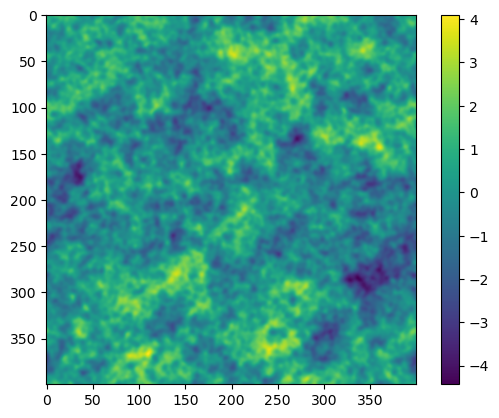

In [161]:
plt.imshow(map[:,::-1],cmap='viridis')
plt.colorbar()

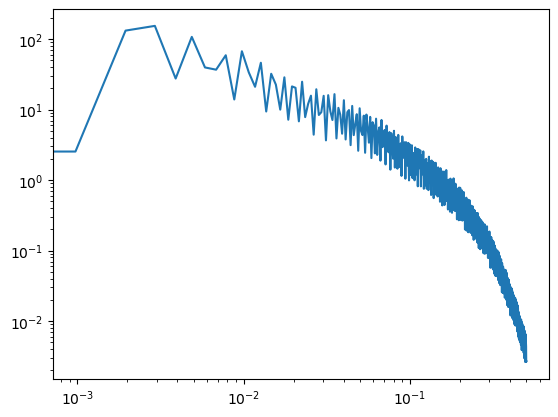

In [106]:
f1,psd1=welch(tod,fs=1,nperseg=1024,window='hanning')
plt.loglog(f1,psd1)

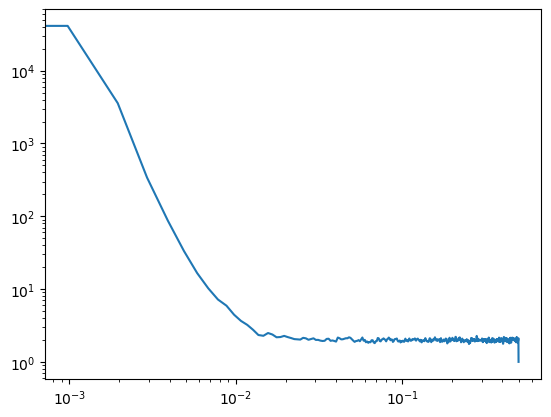

In [107]:
plt.loglog(f,psd)


3 Case study with noise changing. Get clear about the maps and how they work.\
psd of signal and noise combined.\
Modify the solver to take in multiple detector data and then solve for the maximum likelihood solution.\
residual of noise. ( wrong input model vs correct input model )\
real map and then produce solutions.

### Case Study for Noise

In [108]:
nside = 100   # Number of pixels per side
nscan = nside*4 # Number of samples per row. 
npix  = nside**2 # Number of pixels in map



# Generate two scanning patterns
pix_pat1 = (np.mgrid[:nscan,:nscan]*nside/nscan).reshape(2,-1)
pix_pat2 = pix_pat1[::-1] # swap x and y for other pattern
pix      = np.concatenate([pix_pat1,pix_pat2],1)  # Combine the two patterns
nsamp    = pix.shape[1]

# Build a nearest neighbor sparse pointing matrix
iy, ix  = np.floor(pix+0.5).astype(int)%nside  # Nearest pixel
P_nn    = scipy.sparse.csr_array((np.full(nsamp,1),(np.arange(nsamp),iy*nside+ix)),shape=(nsamp,npix))


# Creating a noise simulator
def simul_noise(fknee, alpha, nsamp):
    """
    Simulates noise based on knee frequency (fknee) and the index of the power law (alpha).

    Parameters:
    fknee (float): The knee frequency.
    alpha (float): The spectral index.
    nsamp (int): The number of samples to generate.

    Returns:
    noise (numpy.ndarray): The generated noise signal.
    iN (numpy.ndarray): The inverse of the noise power spectrum.

    The function first calculates the frequency array for the given number of samples using np.fft.rfftfreq.
    It then calculates the power spectrum using the given fknee and alpha parameters.
    The power spectrum is then inverted and limited to a minimum value to avoid division by zero.
    Finally, the function generates a noise sample by multiplying a random sample from a standard normal distribution with the square root of the inverted power spectrum.
    """
    freq  = np.fft.rfftfreq(nsamp)
    iN    = 1/(1+(np.maximum(freq,freq[1]/2)/fknee)**alpha)
    iN    = np.maximum(iN, np.max(iN)*1e-8)
    noise  = fmul(iN**-0.5, np.random.standard_normal(nsamp))
    return noise, iN

# Creating a signal simulator
def simul_signal(nscan, bsigma, index, C=None):
    """
    Simulates a signal based on a given power spectrum.

    Parameters:
    nscan (int): The number of scans, which determines the size of the 2D array to generate.
    bsigma (float): The standard deviation of the Gaussian beam window function.
    index (float): The spectral index for calculating the power spectrum.
    C (numpy.ndarray, optional): An optional input power spectrum. If not provided, a power spectrum is calculated based on the other parameters.

    Returns:
    signal (numpy.ndarray): The simulated signal as a 1D array.
    signal_map (numpy.ndarray): The simulated signal as a 2D array.

    The function first calculates the spatial frequencies associated with the Fourier transform of a 2D array of size nscan x nscan. If a power spectrum is not provided, it calculates one based on these spatial frequencies, a normalization factor, and the given spectral index. It then calculates a Gaussian beam window function based on the spatial frequencies and the given beam standard deviation. Next, it generates a random 2D array from a standard normal distribution, performs a Fourier transform on it, multiplies the result with the square root of the power spectrum and the beam window function, performs an inverse Fourier transform on the result, and extracts the real part. Finally, it reshapes the 2D array into a 1D array and returns both the 1D and 2D arrays.
    """
    l = calc_l(nscan)*nscan/nside # express in units of output pixels
    lnorm = 1
    if C is None:
        C = (np.maximum(l, l[0, 1]/2)/lnorm)**index
    B = np.exp(-0.5*l**2*bsigma**2)
    signal_map = np.fft.ifft2(np.fft.fft2(np.random.standard_normal((nscan, nscan)))*C**0.5*B).real
    signal = np.concatenate([signal_map.reshape(-1), signal_map.T.reshape(-1)])
    return signal, signal_map

# Calculating the PSD
def calculate_psd(signal, noise):
    """
    Calculates the power spectral density (PSD) of a signal, noise, and their sum.

    Parameters:
    signal (numpy.ndarray): The input signal.
    noise (numpy.ndarray): The input noise.

    Returns:
    (f_s, psd_s) (tuple): The frequencies and PSD of the signal.
    (f_n, psd_n) (tuple): The frequencies and PSD of the noise.
    (f_ns, psd_ns) (tuple): The frequencies and PSD of the sum of the signal and noise.

    The function uses the Welch method to estimate the PSD of the signal, noise, and their sum. The PSD is calculated with a Hanning window and a segment length of 1024.
    """
    f_s, psd_s = welch(signal, fs=1, nperseg=1024, window='hanning')
    f_n, psd_n = welch(noise, fs=1, nperseg=1024, window='hanning')
    f_ns, psd_ns = welch(noise+signal, fs=1, nperseg=1024, window='hanning')
    return (f_s, psd_s), (f_n, psd_n), (f_ns, psd_ns)

def plot_psd(psd_signal, psd_noise, psd_signal_noise, keyword):
    """
    Plots the power spectral density (PSD) of a signal, noise, and their sum.

    Parameters:
    psd_signal (tuple): A tuple containing the frequencies and PSD of the signal.
    psd_noise (tuple): A tuple containing the frequencies and PSD of the noise.
    psd_signal_noise (tuple): A tuple containing the frequencies and PSD of the sum of the signal and noise.
    keyword (str): A string to be included in the title of the plot.

    The function creates three subplots. The first subplot is a log-log plot of the signal PSD. The second subplot is a log-log plot of the noise PSD. The third subplot is a log-log plot of the PSD of the sum of the signal and noise, with the signal and noise PSDs also plotted for comparison. The function also sets the title, x-label, and y-label for each subplot, and adds a legend to the third subplot. Finally, the function sets the title for the entire figure and displays the plot.
    """
    plt.style.use('default')
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    ax[0].loglog(*psd_signal)
    ax[0].set_title('Signal PSD', fontsize=15)
    ax[0].set_xlabel('Frequency', fontsize=15)
    ax[0].set_ylabel('PSD', fontsize=15)
    
    ax[1].loglog(*psd_noise)
    ax[1].set_title('Noise PSD', fontsize=15)
    ax[1].set_xlabel('Frequency', fontsize=15)
    ax[1].set_ylabel('PSD', fontsize=15)
    
    ax[2].loglog(*psd_signal_noise, label ='Signal+Noise',lw=2)
    ax[2].loglog(*psd_noise, alpha=0.5, label='Noise', c='r', ls='--')
    ax[2].loglog(*psd_signal, alpha=0.5, label='Signal', c='g', ls='--')
    ax[2].set_title('Signal+Noise PSD', fontsize=15)
    ax[2].set_xlabel('Frequency', fontsize=15)
    ax[2].set_ylabel('PSD', fontsize=15)
    ax[2].legend(fontsize=15)
    
    for a in ax:
        a.tick_params(axis='both', which='both', direction='in', labelsize=12)
        for spine in a.spines.values():
            spine.set_linewidth(1.5)
    
    fig.suptitle(f'Simulated CMB Signal and {keyword} Noise Power Spectral Density Analysis', fontsize=20)
    plt.tight_layout()
    plt.show()

# simulate different types of noise
noise_w,iN_w = simul_noise(0.01,0,nsamp)
noise_r,iN_r = simul_noise(0.01,-3.5,nsamp)
noise_ex,iN_ex = simul_noise(0.01,-5,nsamp)
t_signal,t_map = simul_signal(nscan,3,-2)


psd_signalw, psd_noisew, psd_signal_noisew = calculate_psd(t_signal, noise_w)
psd_signalr, psd_noiser, psd_signal_noiser = calculate_psd(t_signal, noise_r)
psd_signale, psd_noisee, psd_signal_noisee = calculate_psd(t_signal, noise_ex)



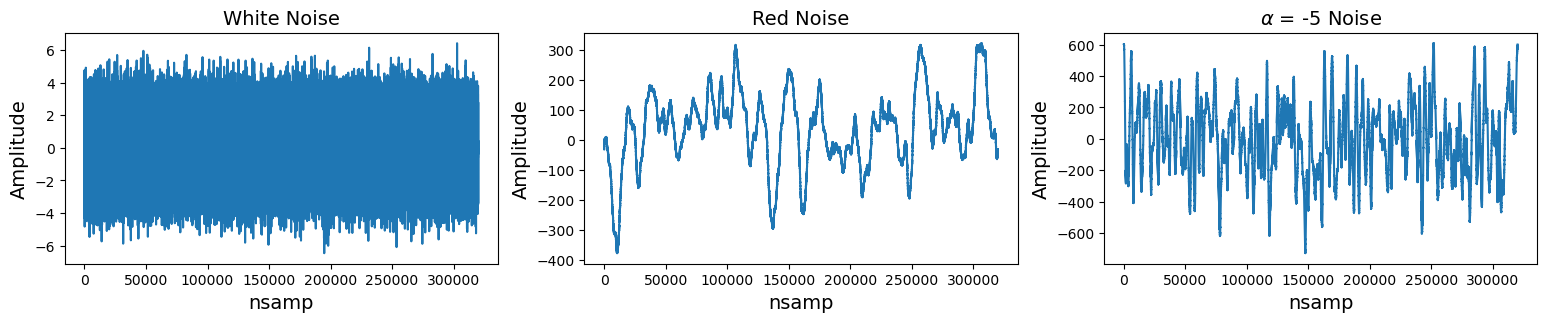

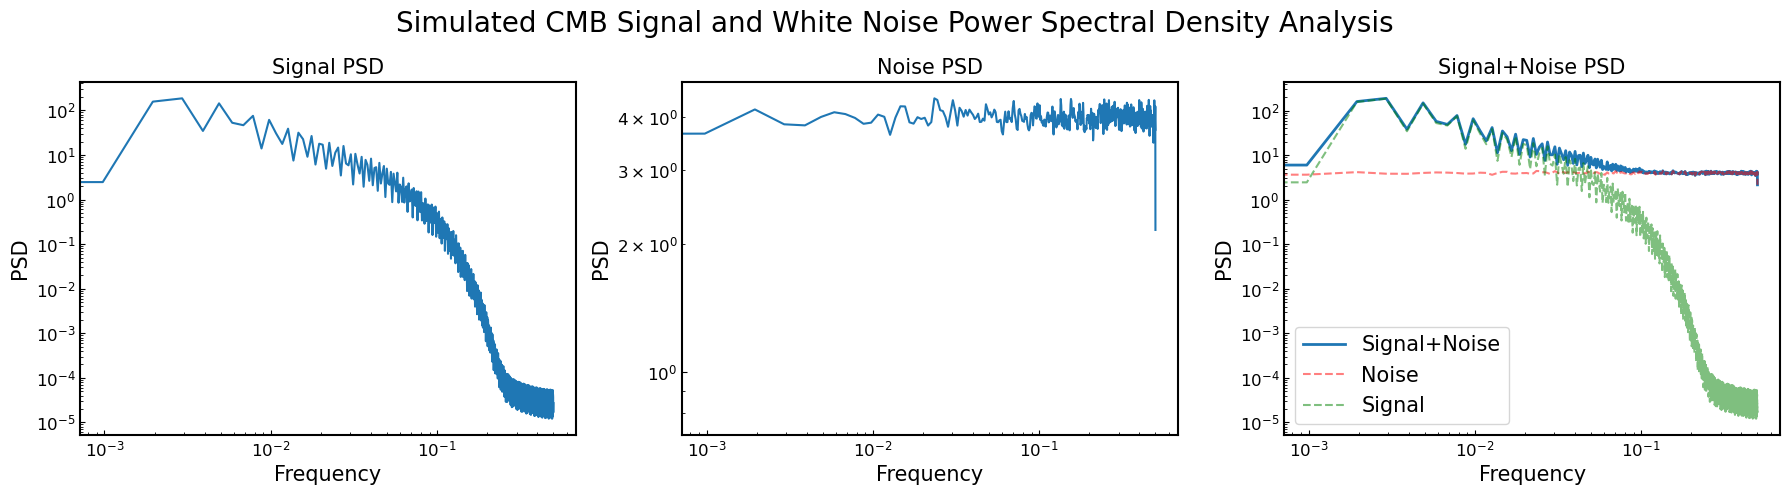

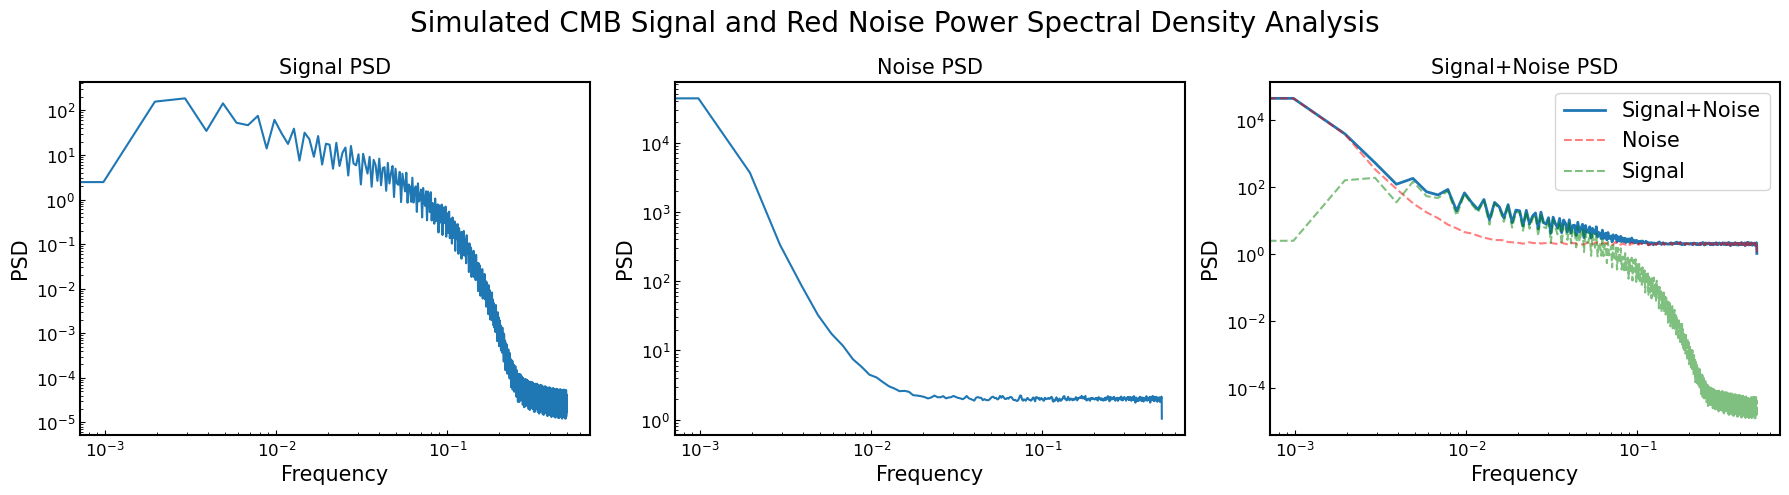

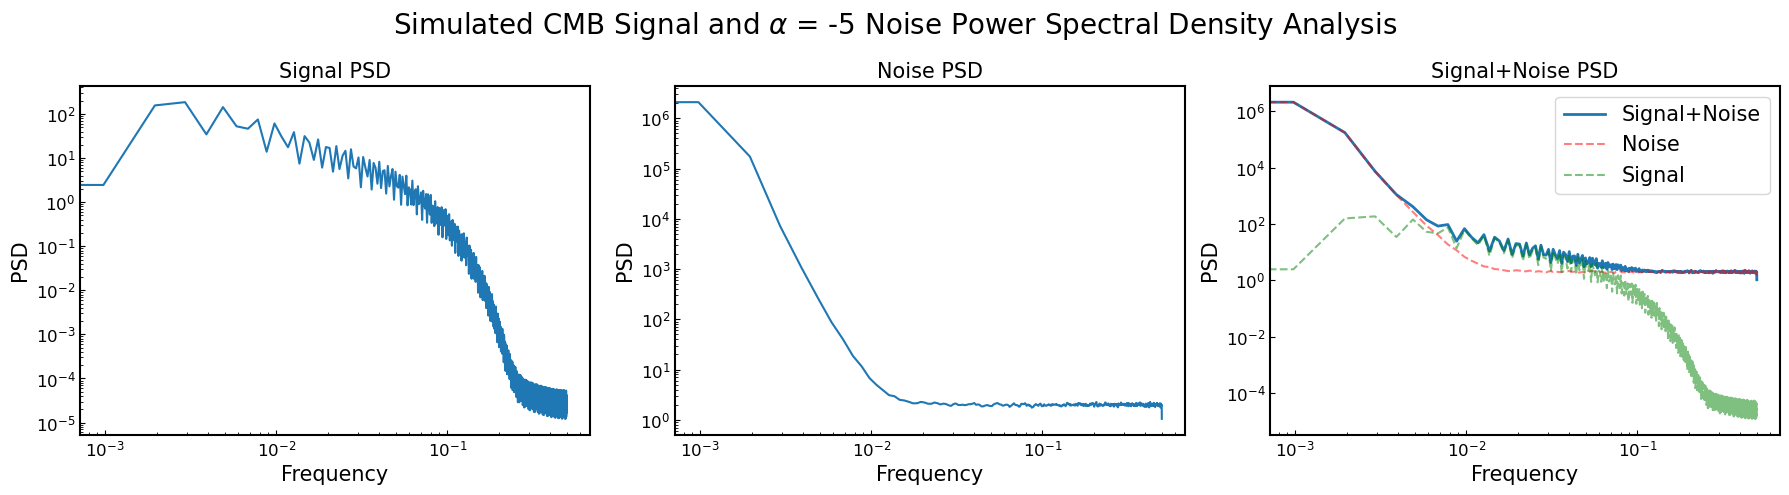

In [109]:
# Noise Plotting
fig, ax = plt.subplots(1, 3, figsize=(19, 3))
ax[0].plot(np.arange(nsamp), noise_w)
ax[0].set_title('White Noise', fontsize=14)
ax[0].set_xlabel('nsamp', fontsize=14)
ax[0].set_ylabel('Amplitude', fontsize=14)

ax[1].plot(np.arange(nsamp), noise_r)
ax[1].set_title('Red Noise', fontsize=14)
ax[1].set_xlabel('nsamp', fontsize=14)
ax[1].set_ylabel('Amplitude', fontsize=14)

ax[2].plot(np.arange(nsamp), noise_ex)
ax[2].set_title('$\u03b1$ = -5 Noise', fontsize=14)
ax[2].set_xlabel('nsamp', fontsize=14)
ax[2].set_ylabel('Amplitude', fontsize=14)


plot_psd(psd_signalw, psd_noisew, psd_signal_noisew, 'White')
plot_psd(psd_signalr, psd_noiser, psd_signal_noiser, 'Red')
plot_psd(psd_signale, psd_noisee, psd_signal_noisee, '$\u03b1$ = -5')

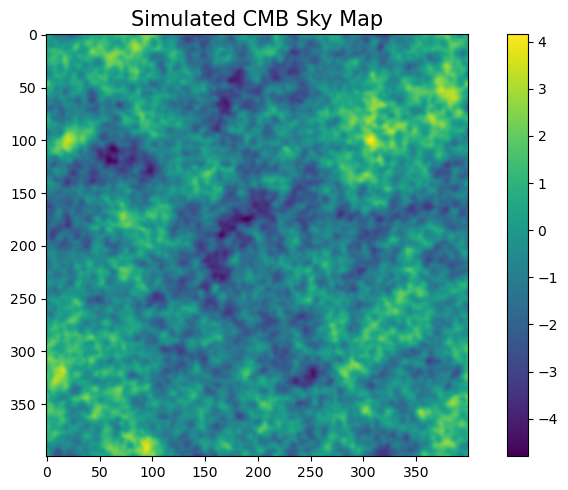

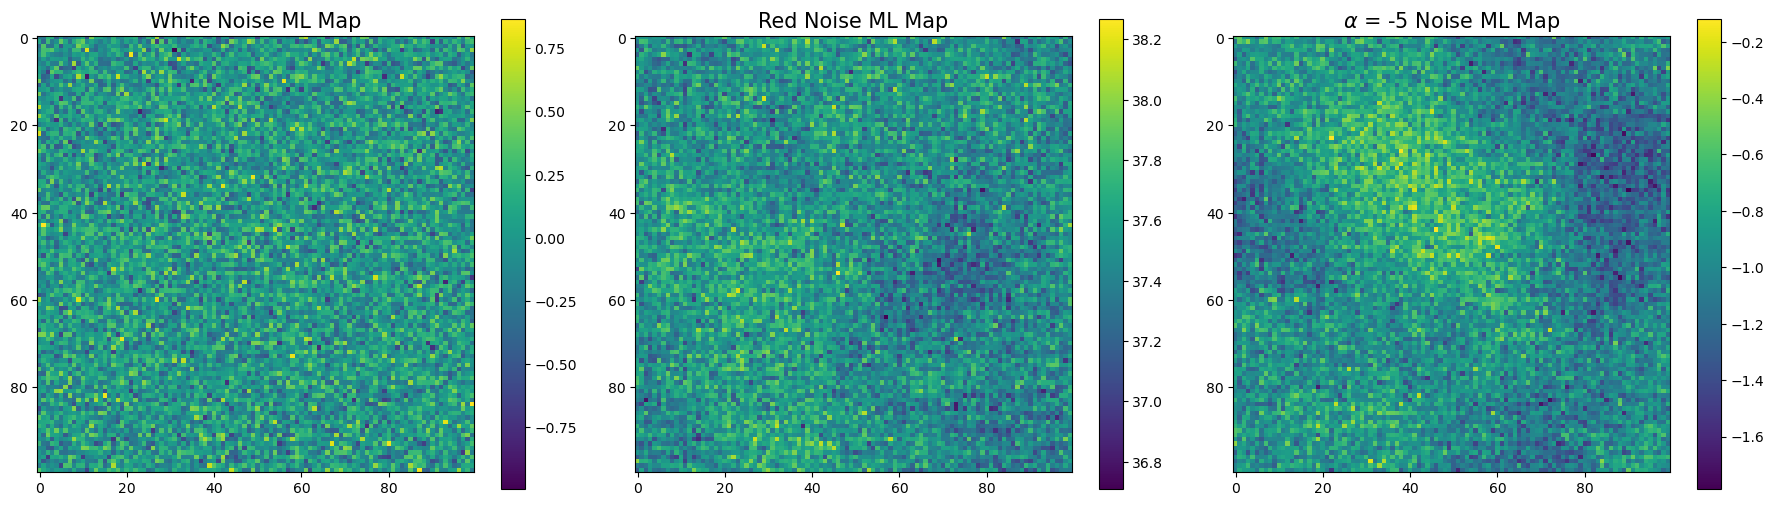

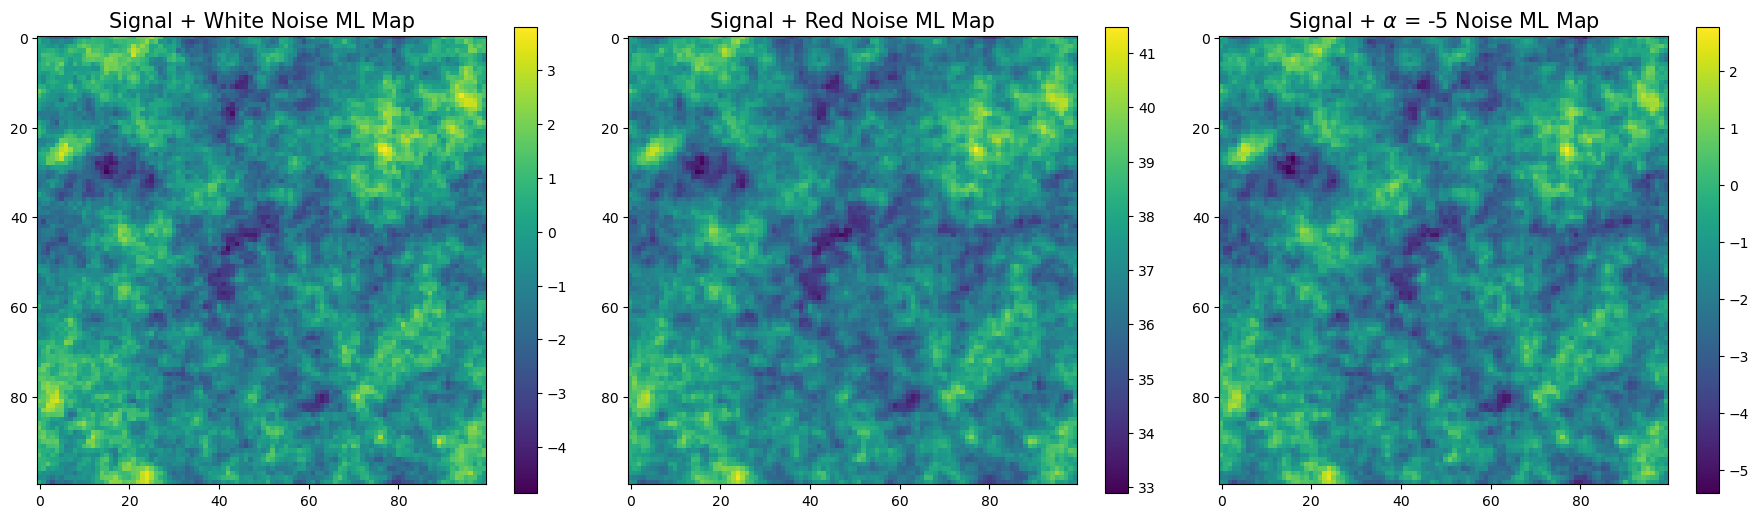

In [110]:
# ML solution of all the noises
map_ml_nw=mapmaker_ml(noise_w,P_nn,iN_w)
map_ml_nr=mapmaker_ml(noise_r,P_nn,iN_r)
map_ml_nex=mapmaker_ml(noise_ex,P_nn,iN_ex)

#plotting the Simulated CMB Sky Map
plt.figure(figsize=(8,5))
plt.imshow(t_map)
plt.colorbar()
plt.title('Simulated CMB Sky Map', fontsize=15)
plt.tight_layout()

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].imshow(map_ml_nw)
ax[0].set_title('White Noise ML Map', fontsize=15)
ax[1].imshow(map_ml_nr)
ax[1].set_title('Red Noise ML Map', fontsize=15)
ax[2].imshow(map_ml_nex)
ax[2].set_title('$\u03b1$ = -5 Noise ML Map', fontsize=15)
fig.colorbar(ax[0].imshow(map_ml_nw), ax=ax[0])
fig.colorbar(ax[1].imshow(map_ml_nr), ax=ax[1])
fig.colorbar(ax[2].imshow(map_ml_nex), ax=ax[2])
plt.tight_layout()

# Signal and noise added map
map_ml_snw=mapmaker_ml(t_signal+noise_w,P_nn,iN_w)
map_ml_snr=mapmaker_ml(t_signal+noise_r,P_nn,iN_r)
map_ml_snex=mapmaker_ml(t_signal+noise_ex,P_nn,iN_ex)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].imshow(map_ml_snw)
ax[0].set_title('Signal + White Noise ML Map', fontsize=15)
ax[1].imshow(map_ml_snr)
ax[1].set_title('Signal + Red Noise ML Map', fontsize=15)
ax[2].imshow(map_ml_snex)
ax[2].set_title('Signal + $\u03b1$ = -5 Noise ML Map', fontsize=15)
fig.colorbar(ax[0].imshow(map_ml_snw), ax=ax[0])
fig.colorbar(ax[1].imshow(map_ml_snr), ax=ax[1])
fig.colorbar(ax[2].imshow(map_ml_snex), ax=ax[2])
plt.tight_layout()




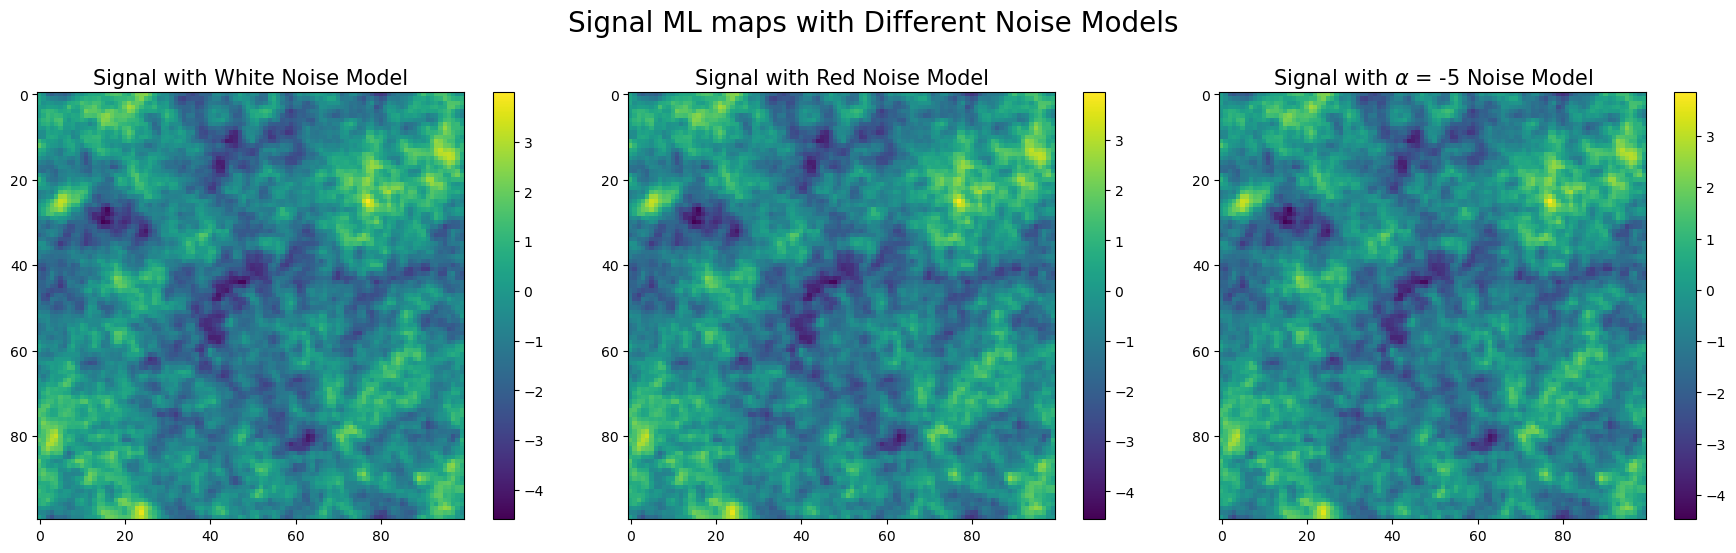

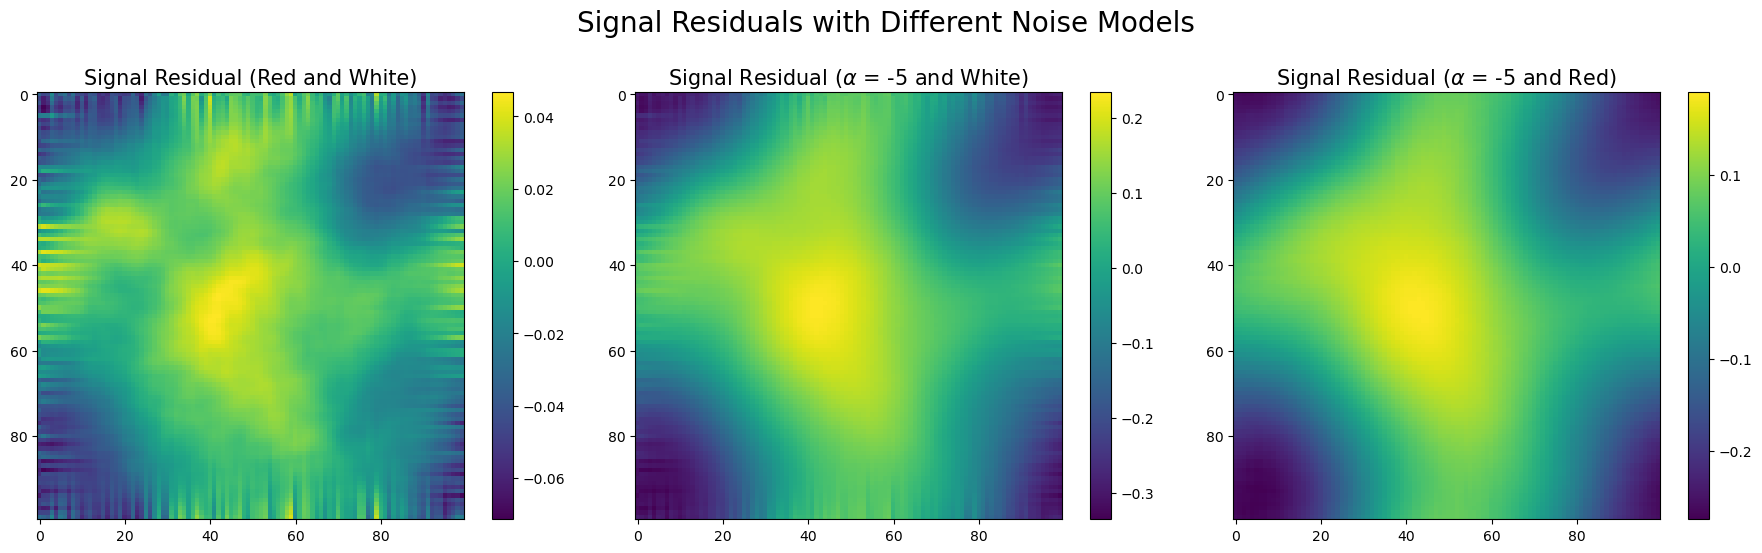

In [111]:
# Signal only map
map_ml_sw=mapmaker_ml(t_signal,P_nn,iN_w)
map_ml_sr=mapmaker_ml(t_signal,P_nn,iN_r)
map_ml_sex=mapmaker_ml(t_signal,P_nn,iN_ex)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].imshow(map_ml_sw)
ax[0].set_title('Signal with White Noise Model', fontsize=15)
ax[1].imshow(map_ml_sr)
ax[1].set_title('Signal with Red Noise Model', fontsize=15)
ax[2].imshow(map_ml_sex)
ax[2].set_title('Signal with $\u03b1$ = -5 Noise Model', fontsize=15)
fig.colorbar(ax[0].imshow(map_ml_sw), ax=ax[0])
fig.colorbar(ax[1].imshow(map_ml_sr), ax=ax[1])
fig.colorbar(ax[2].imshow(map_ml_sex), ax=ax[2])
fig.suptitle('Signal ML maps with Different Noise Models', fontsize=20, y=1.05)
plt.tight_layout()

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].imshow(map_ml_sr-map_ml_sw)
ax[0].set_title('Signal Residual (Red and White)', fontsize=15)
ax[1].imshow(map_ml_sex-map_ml_sw)
ax[1].set_title('Signal Residual ($\u03b1$ = -5 and White)', fontsize=15)
ax[2].imshow(map_ml_sex-map_ml_sr)
ax[2].set_title('Signal Residual ($\u03b1$ = -5 and Red)', fontsize=15)
fig.colorbar(ax[0].imshow(map_ml_sr-map_ml_sw), ax=ax[0])
fig.colorbar(ax[1].imshow(map_ml_sex-map_ml_sw), ax=ax[1])
fig.colorbar(ax[2].imshow(map_ml_sex-map_ml_sr), ax=ax[2])
fig.suptitle('Signal Residuals with Different Noise Models', fontsize=20, y=1.05)
plt.tight_layout()

### Simulating a much realistic CMB sky

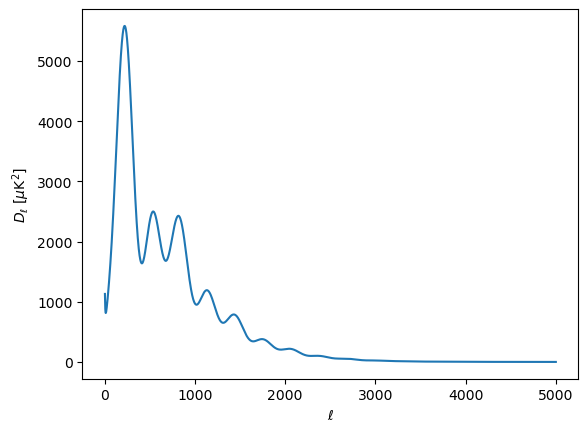

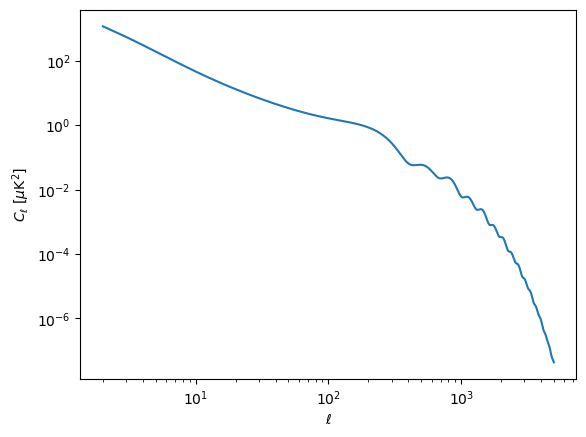

In [112]:
ell, DlTT = np.loadtxt("CAMB_fiducial_cosmo_scalClsdat.sec", usecols=(0, 1), unpack=True)
plt.plot(ell,DlTT)
plt.ylabel('$D_{\ell}$ [$\mu$K$^2$]')
plt.xlabel('$\ell$')
plt.show()

ClTT = DlTT * 2 * np.pi / (ell*(ell+1.))
# ClTT[0] = 0. # set the monopole and the dipole of the Cl spectrum to zero
# ClTT[1] = 0.
plt.loglog(ell,ClTT)
plt.ylabel('$C_{\ell}$ [$\mu$K$^2$]')
plt.xlabel('$\ell$')
plt.show()

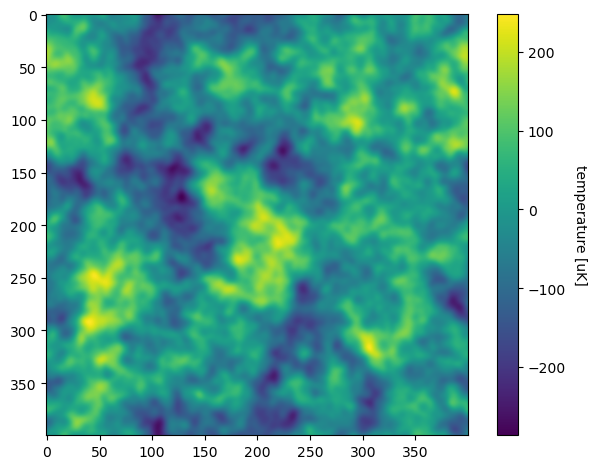

In [134]:
## create map array
map_size = 5.*40.   # map size in arcminutes
pix_size = 0.5    # pixel size in arcminutes
N = int(map_size/pix_size)  # dimension of the map array

## make a 2D array of X and Y coordinates
X,Y = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))

## define the radial coordinate R of each pixel. R is real-space counterpart of fourier variable k
R = np.sqrt(X**2. + Y**2.)

pix_to_rad = (pix_size/40. * np.pi/180.)   # this is the pixel size in radians
ell_scale_factor = np.pi /pix_to_rad    # here we connect angular size to the multipoles
ell2d = R * ell_scale_factor     # this is the Fourier analog of the real-vector R in 2D


## create 2D power spectrum
ClTT_expanded = np.zeros(int(ell2d.max())+1)
ClTT_expanded[0:(ClTT.size)] = ClTT  # fill in the Cls until the max of the ClTT vector
ClTT2d = ClTT_expanded[ell2d.astype(int)]

## make random realization of a Gaussian field and Fourier transform
random_array_for_T = np.random.normal(0,1,(N,N))
FT_random_array_for_T = np.fft.fft2(random_array_for_T)   # take FFT since we are in Fourier space 
    
FT_2d = np.sqrt(ClTT2d) * FT_random_array_for_T # we take the sqrt since the power spectrum is T^2
    
    
# move back from ell space to real space
CMB_T = np.fft.ifft2(np.fft.fftshift(FT_2d)) 
# move back to pixel space for the map
CMB_T = CMB_T/pix_to_rad
# we only want to plot the real component
CMB_T = np.real(CMB_T)


## plot the CMB map

im = plt.imshow(CMB_T)
cbar = plt.colorbar(im, orientation='vertical')
cbar.set_label('temperature [uK]', rotation=270, labelpad=15)
plt.tight_layout()

plt.show()


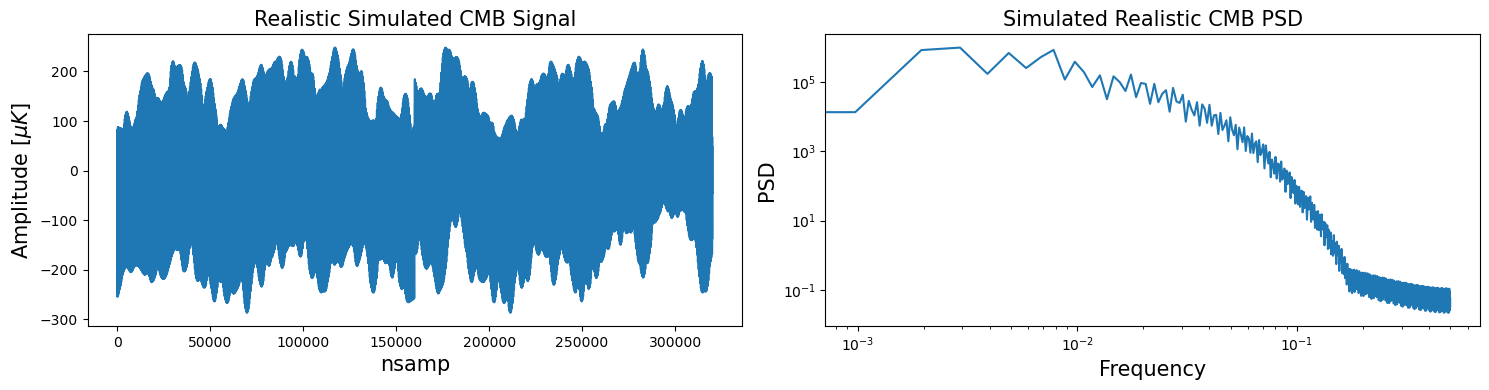

In [135]:
realistic_signal=np.concatenate([CMB_T.reshape(-1), CMB_T.T.reshape(-1)])
#plotting the signal and its psd
realf_s, realpsd_s = welch(realistic_signal, fs=1, nperseg=1024, window='hanning')
realf_s_wn, realpsd_s_wn = welch(realistic_signal+noise_w, fs=1, nperseg=1024, window='hanning')
realf_s_rn, realpsd_s_rn = welch(realistic_signal+noise_r, fs=1, nperseg=1024, window='hanning')
realf_s_exn, realpsd_s_exn = welch(realistic_signal+noise_ex, fs=1, nperseg=1024, window='hanning')
fig,ax=plt.subplots(1,2,figsize=(15,4))
ax[0].plot(np.arange(len(realistic_signal)),realistic_signal)
ax[0].set_title('Realistic Simulated CMB Signal', fontsize=15)
ax[0].set_xlabel('nsamp', fontsize=15)
ax[0].set_ylabel('Amplitude [$\mu K$]', fontsize=15)
ax[1].loglog(realf_s, realpsd_s)
ax[1].set_title('Simulated Realistic CMB PSD', fontsize=15)
ax[1].set_xlabel('Frequency', fontsize=15)
ax[1].set_ylabel('PSD', fontsize=15)
plt.tight_layout()

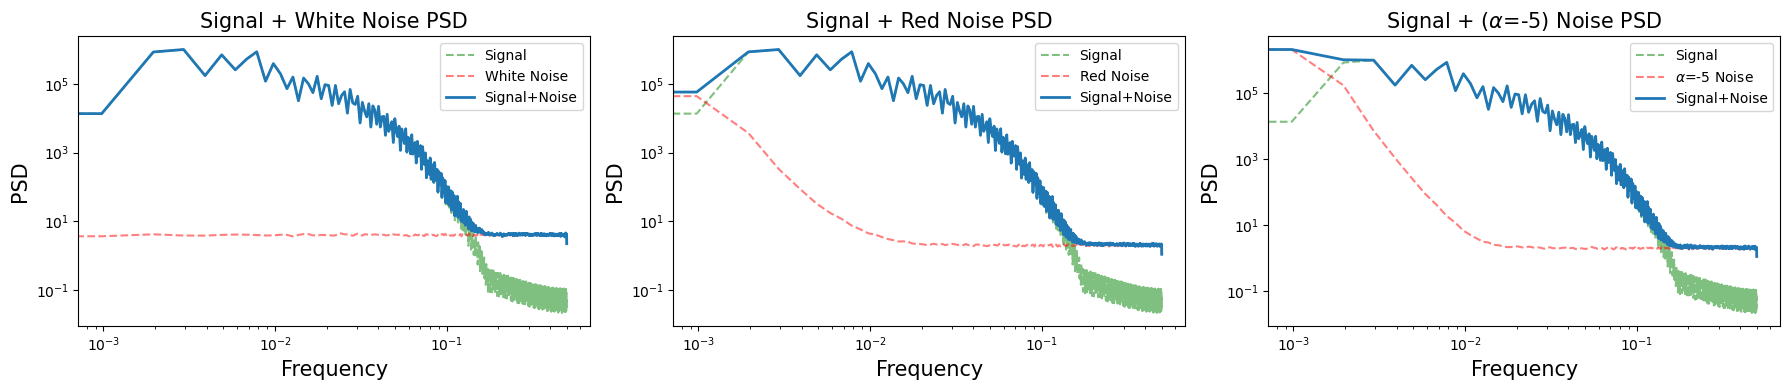

In [136]:
fig, ax=plt.subplots(1,3,figsize=(18,4))
ax[0].loglog(realf_s, realpsd_s, alpha=0.5,c='g', ls='--',label='Signal')
ax[0].loglog(*psd_noisew, alpha=0.5, label='White Noise', c='r', ls='--')
ax[0].loglog(realf_s_wn, realpsd_s_wn, label='Signal+Noise',lw=2)
ax[0].set_title('Signal + White Noise PSD', fontsize=15)
ax[0].set_xlabel('Frequency', fontsize=15)
ax[0].set_ylabel('PSD', fontsize=15)
ax[0].legend()
ax[1].loglog(realf_s, realpsd_s, alpha=0.5,c='g', ls='--',label='Signal')
ax[1].loglog(*psd_noiser, alpha=0.5, label='Red Noise', c='r', ls='--')
ax[1].loglog(realf_s_rn, realpsd_s_rn,lw=2, label='Signal+Noise')
ax[1].set_title('Signal + Red Noise PSD', fontsize=15)
ax[1].set_xlabel('Frequency', fontsize=15)
ax[1].set_ylabel('PSD', fontsize=15)
ax[1].legend()
ax[2].loglog(realf_s, realpsd_s, alpha=0.5,c='g', ls='--',label='Signal')
ax[2].loglog(*psd_noisee, alpha=0.5, label='$\u03b1$=-5 Noise', c='r', ls='--')
ax[2].loglog(realf_s_exn, realpsd_s_exn, label='Signal+Noise',lw=2)
ax[2].set_title('Signal + ($\u03b1$=-5) Noise PSD', fontsize=15)
ax[2].set_xlabel('Frequency', fontsize=15)
ax[2].set_ylabel('PSD', fontsize=15)
ax[2].legend()
plt.tight_layout()


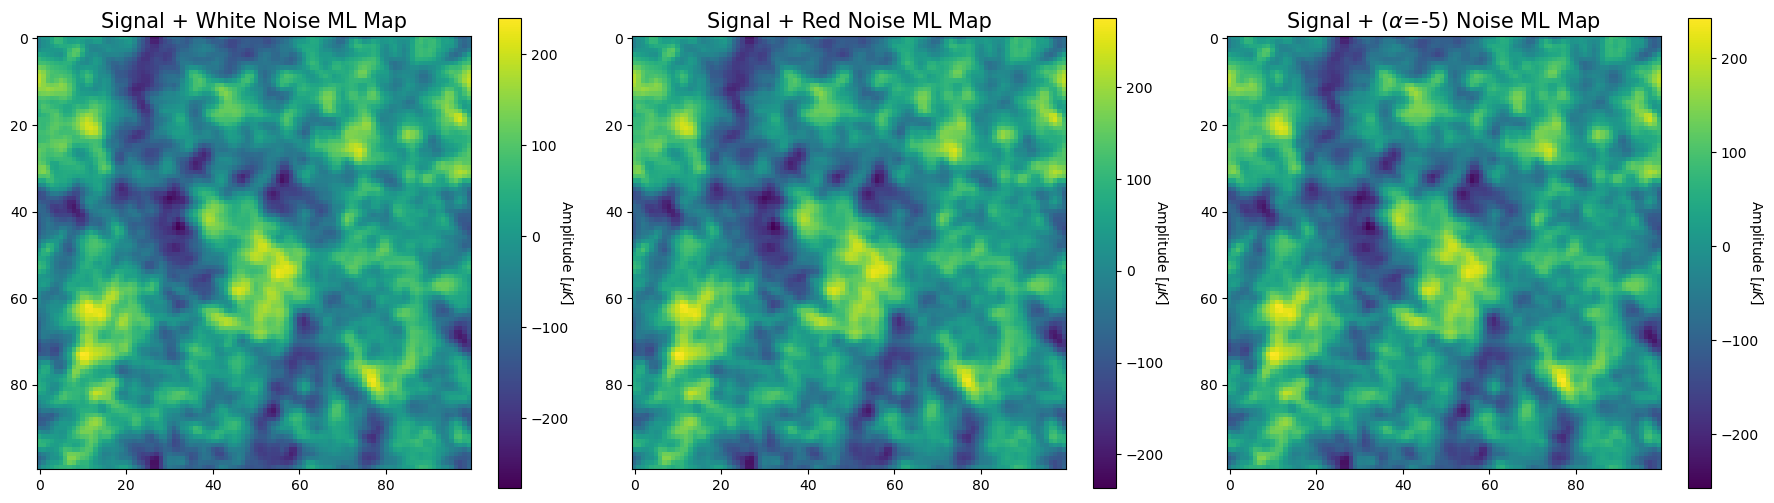

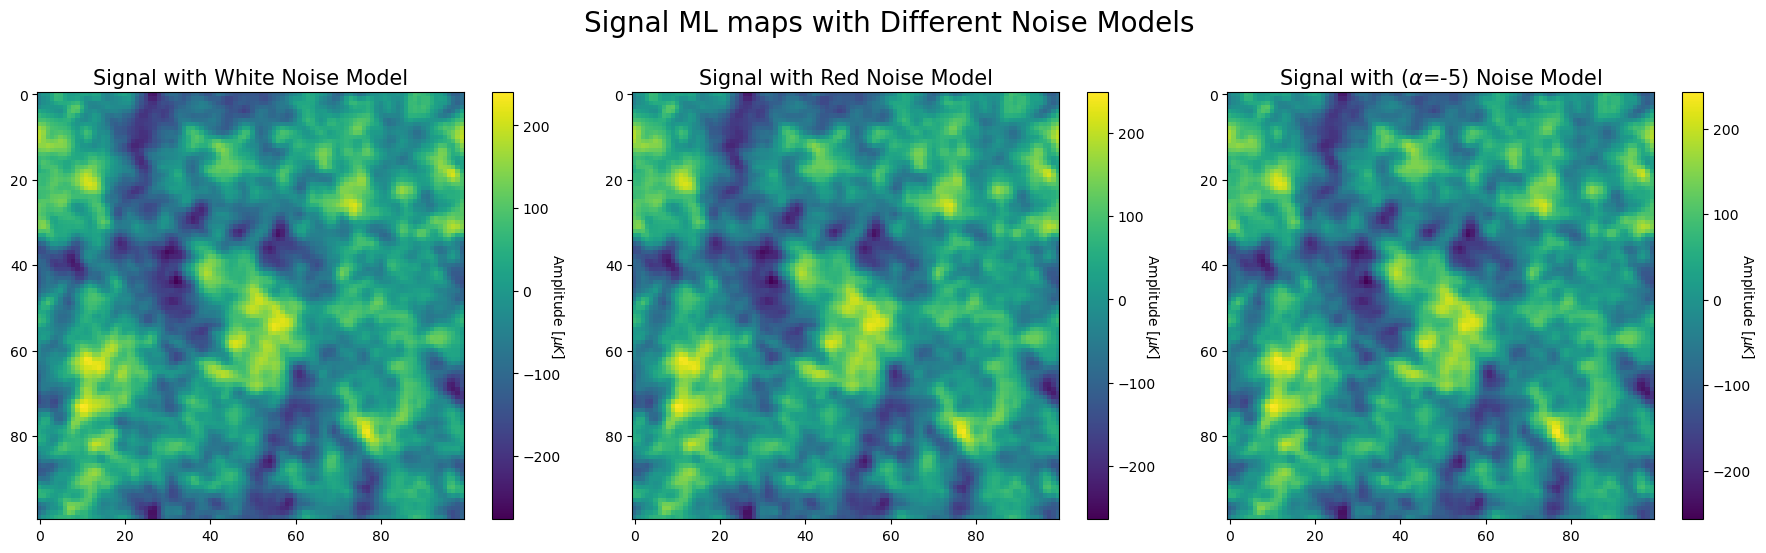

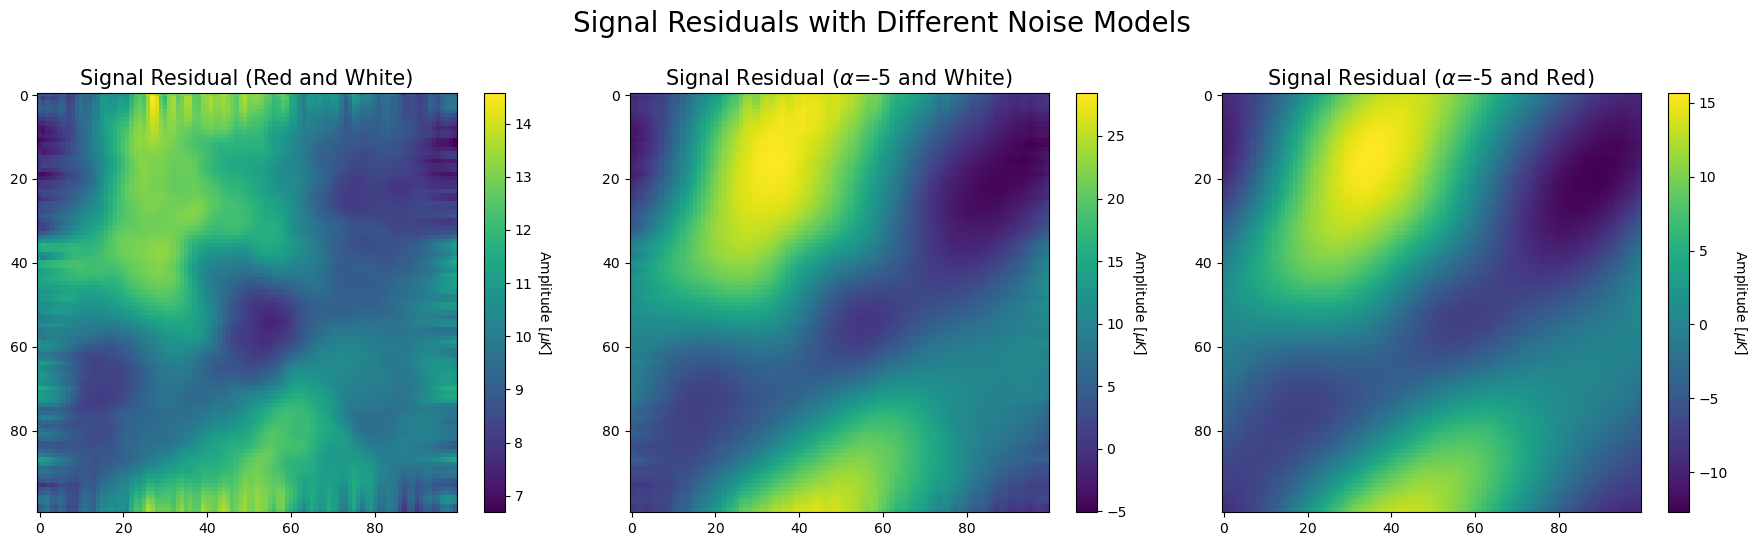

In [137]:
# Signal and noise added map
realmap_ml_snw=mapmaker_ml(realistic_signal+noise_w,P_nn,iN_w)
realmap_ml_snr=mapmaker_ml(realistic_signal+noise_r,P_nn,iN_r)
realmap_ml_snex=mapmaker_ml(realistic_signal+noise_ex,P_nn,iN_ex)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].imshow(map_ml_snw)
ax[0].set_title('Signal + White Noise ML Map', fontsize=15)
ax[1].imshow(map_ml_snr)
ax[1].set_title('Signal + Red Noise ML Map', fontsize=15)
ax[2].imshow(map_ml_snex)
ax[2].set_title('Signal + ($\u03b1$=-5) Noise ML Map', fontsize=15)
cbar0=fig.colorbar(ax[0].imshow(realmap_ml_snw), ax=ax[0])
cbar1=fig.colorbar(ax[1].imshow(realmap_ml_snr), ax=ax[1])
cbar2=fig.colorbar(ax[2].imshow(realmap_ml_snex), ax=ax[2])
cbar0.set_label('Amplitude [$\mu K$]', rotation=270)
cbar1.set_label('Amplitude [$\mu K$]', rotation=270)
cbar2.set_label('Amplitude [$\mu K$]', rotation=270)
plt.tight_layout()


# Signal only map
realmap_ml_sw=mapmaker_ml(realistic_signal,P_nn,iN_w)
realmap_ml_sr=mapmaker_ml(realistic_signal,P_nn,iN_r)
realmap_ml_sex=mapmaker_ml(realistic_signal,P_nn,iN_ex)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].imshow(realmap_ml_sw)
ax[0].set_title('Signal with White Noise Model', fontsize=15)
ax[1].imshow(realmap_ml_sr)
ax[1].set_title('Signal with Red Noise Model', fontsize=15)
ax[2].imshow(realmap_ml_sex)
ax[2].set_title('Signal with ($\u03b1$=-5) Noise Model', fontsize=15)
cbar0=fig.colorbar(ax[0].imshow(realmap_ml_sw), ax=ax[0])
cbar1=fig.colorbar(ax[1].imshow(realmap_ml_sr), ax=ax[1])
cbar2=fig.colorbar(ax[2].imshow(realmap_ml_sex), ax=ax[2])
cbar0.set_label('Amplitude [$\mu K$]', rotation=270)
cbar1.set_label('Amplitude [$\mu K$]', rotation=270)
cbar2.set_label('Amplitude [$\mu K$]', rotation=270)
fig.suptitle('Signal ML maps with Different Noise Models', fontsize=20, y=1.05)
plt.tight_layout()

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].imshow(realmap_ml_sr-realmap_ml_sw)
ax[0].set_title('Signal Residual (Red and White)', fontsize=15)
ax[1].imshow(realmap_ml_sex-realmap_ml_sw)
ax[1].set_title('Signal Residual ($\u03b1$=-5 and White)', fontsize=15)
ax[2].imshow(realmap_ml_sex-realmap_ml_sr)
ax[2].set_title('Signal Residual ($\u03b1$=-5 and Red)', fontsize=15)
cbar0=fig.colorbar(ax[0].imshow(realmap_ml_sr-realmap_ml_sw), ax=ax[0])
cbar1=fig.colorbar(ax[1].imshow(realmap_ml_sex-realmap_ml_sw), ax=ax[1])
cbar2=fig.colorbar(ax[2].imshow(realmap_ml_sex-realmap_ml_sr), ax=ax[2])
cbar0.set_label('Amplitude [$\mu K$]', rotation=270, labelpad=15)
cbar1.set_label('Amplitude [$\mu K$]', rotation=270, labelpad=15)
cbar2.set_label('Amplitude [$\mu K$]', rotation=270, labelpad=15)
fig.suptitle('Signal Residuals with Different Noise Models', fontsize=20, y=1.05)
plt.tight_layout()

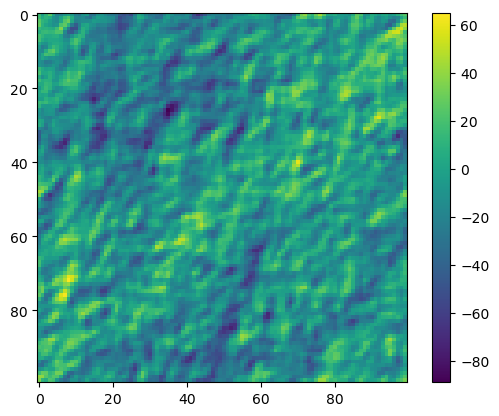

In [172]:
from skimage.measure import block_reduce

# Use block_reduce to downsample the array
downsampled_arr = block_reduce(CMB_T, block_size=(4, 4), func=np.mean)

plt.imshow(downsampled_arr-realmap_ml_sex)
plt.colorbar()  # Outputs: (100, 100)